In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [17]:
df = pd.read_csv('yelp.csv')

In [18]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 546.9+ KB


In [20]:
print(df.describe())

              stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000


In [21]:
df['text length'] = df['text'].apply(len)

In [22]:
sns.set_style('white')

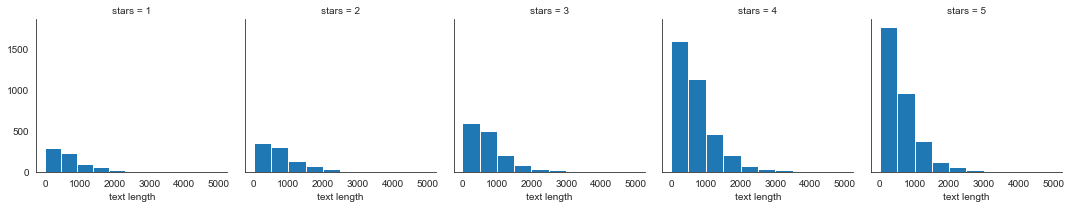

In [26]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text length')

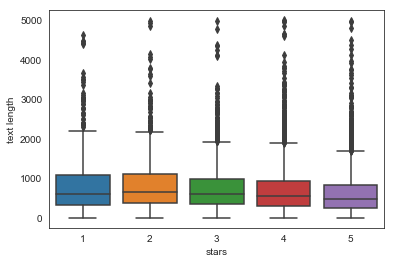

In [28]:
sns.boxplot(x='stars',y='text length', data = df)

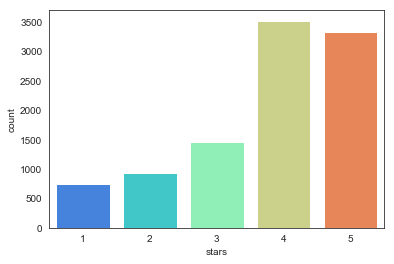

In [30]:
sns.countplot(x='stars',data=df,palette='rainbow')

In [31]:
stars = df.groupby('stars').mean()

In [32]:
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [33]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


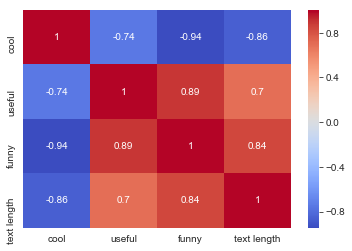

In [34]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In [35]:
yelp_class = df[(df.stars == 1) | (df.stars==5)]

In [41]:
X = yelp_class['text']
y = yelp_class['stars']

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [43]:
X = cv.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
nb = MultinomialNB()

In [48]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
predictions = nb.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report

In [51]:
print(confusion_matrix(y_test,predictions))

[[159  69]
 [ 22 976]]


In [53]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [54]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [55]:
from sklearn.pipeline import Pipeline

In [57]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [58]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [59]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [60]:
predictions = pipeline.predict(X_test)

In [61]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\WELCOME\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
